Topic:- customer segmentation 

Data  contains all the transactions occurring between 2010 2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Problem statement:- segment the Customers based on RFM so that the company can target its customers efficiently.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


# Reading data and preprocessing


In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\CAPSTON PROJECT\OnlineRetail.csv",encoding= 'unicode_escape')

In [3]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84406B  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84406B       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  1/12/2010 8:26       2.55     17850.0  United Kingdom  
1  1/12/2010 8:26       3.39     17850.0  United Kingdom  
2  1/12/2010 8:26       2.75     17850.0  United Kingdom  
3  1/12/2010 8:26       3.39     17850.0  United Kingdom  
4  1/12/2010 8:26       3.39     17850.0  United Kingdom  
5  1/12/2010 8:26       7.65     17850.0  United Kingdom  
6  1/12/2010 8:26       4.25     17850.0  United Kingdom  
7  1/12/2010 8:28       1.85     17850.0  United Kingdom  
8  1/12/2010 8:28       1.85     17850.0  United Kingdom  
9  1/12/2010 8:34       1.69     13047.0  United Kingdom

In [4]:
df.shape


(541909, 8)

In [5]:



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
# Checking for nulls in the data.
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, 'Missing null values')

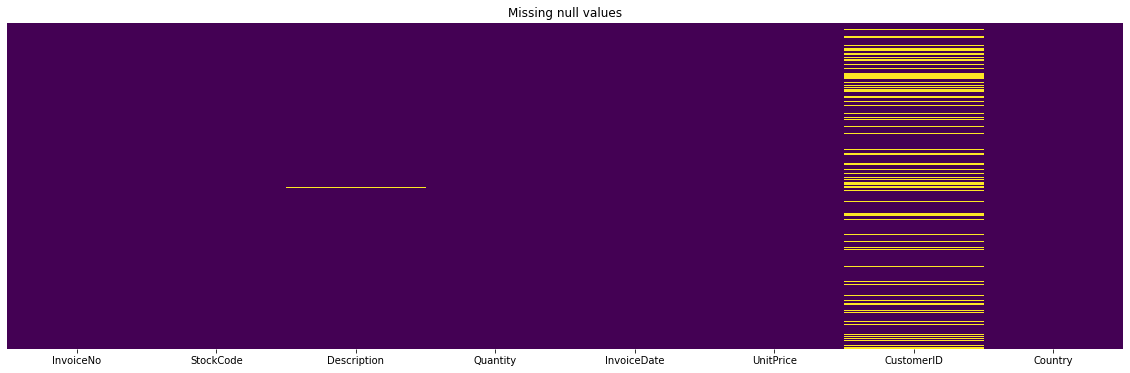

In [8]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

In [9]:
#droping null values from Description
df.dropna(subset=['Description'], inplace=True)

Checking Duplicate Entries

In [10]:
print("Duplicate entries=",df.duplicated().sum())

Duplicate entries= 5268


In [11]:
df.drop_duplicates(inplace=True)

Removing Cancelled orders

In [12]:
invoices = df['InvoiceNo']
x = invoices.str.contains('C',regex=True)

In [13]:
x= x.astype(int)
x.value_counts()     

0    525936
1      9251
Name: InvoiceNo, dtype: int64

creating new column for cancel orders

In [14]:
df['Cancelled_Orders']=x

In [15]:
df = df.loc[df['Cancelled_Orders'] == 0,:]
df.reset_index(drop=True,inplace=True)

In [16]:
df['Quantity'].sum()

5451671

In [17]:
df.tail(5)

InvoiceNo StockCode                      Description  Quantity  \
525931    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
525932    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
525933    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
525934    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
525935    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  Cancelled_Orders  
525931  9/12/2011 12:50       0.85     12680.0  France                 0  
525932  9/12/2011 12:50       2.10     12680.0  France                 0  
525933  9/12/2011 12:50       4.15     12680.0  France                 0  
525934  9/12/2011 12:50       4.15     12680.0  France                 0  
525935  9/12/2011 12:50       4.95     12680.0  France                 0

We find out that CustomerID values are missing for those customers which have negative quantity values. Therefore, we will remove them too.

In [18]:
df = df[df['CustomerID'].notna()]

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84406B  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84406B       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
392727    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
392728    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
392729    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
392730    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
392731    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  \
0        1/12/2010 8:26       2.55     17850.0  United Kingdom   
1        1/12/2010 8:26       3.39     17850.0  United Kingdom   
2        1/12/2010 8:26       2.75     17850.0  United Kingdom   
3        1/12/2010 8:26       3.39     17850.0  United Kingdom   
4        1/12/2010 8:26       3.39     17850.0  United Kingdom   
...                 ...        ...         ...             ...   
392727  9/12/2011 12:50       0.85     12680.0          France   
392728  9/12/2011 12:50       2.10     12680.0          France   
392729  9/12/2011 12:50       4.15     12680.0          France   
392730  9/12/2011 12:50       4.15     12680.0          France   
392731  9/12/2011 12:50       4.95     12680.0          France   

        Cancelled_Orders  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
392727                 0  
392728                 0  
392729                 0  
392730                 0  
392731                 0  

[392732 rows x 9 columns]

In [21]:
#remove cancelled orders column 
df = df.drop(['Cancelled_Orders'],axis= 1)

In [22]:
#Checking country wise distribution of transactions.
df['Country'].value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [23]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
                                      ... 
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
BLUE/NAT SHELL NECKLACE W PENDANT        1
PINK EASTER HENS+FLOWER                  1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3877, dtype: int64

In [24]:
df.to_csv('dataframe.csv', index= False)

In [25]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Cohort Analysis


What is Cohort Analysis?

A cohort is a set of users who share similar characteristics over time. Cohort analysis groups the users into mutually exclusive groups and their behaviour is measured over time.

It can provide information about product and customer lifecycle.

In the following analysis, we will create Time cohorts and look at customers who remain active during particular cohorts over a period of time that they transact over.



In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

data contains only 6% of data before date '2010-12-01'so we considering data which store after '2010-12-01'

In [27]:
df2=df[df['InvoiceDate'] >= '2010-12-01']

In [28]:
df2.tail(5)

InvoiceNo StockCode                      Description  Quantity  \
392727    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
392728    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
392729    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
392730    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
392731    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
392727 2011-09-12 12:50:00       0.85     12680.0  France  
392728 2011-09-12 12:50:00       2.10     12680.0  France  
392729 2011-09-12 12:50:00       4.15     12680.0  France  
392730 2011-09-12 12:50:00       4.15     12680.0  France  
392731 2011-09-12 12:50:00       4.95     12680.0  France

In [30]:
#creat an Invoice Month
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year,x.month ,1)

In [31]:
df2['InvoiceDate'].dtype

dtype('<M8[ns]')

In [32]:
df2['InvoiceDate']=pd.to_datetime(df2['InvoiceDate'])

In [33]:
df2['InvoiceMonth'] = df2['InvoiceDate'].apply(get_month)

In [34]:
df2

InvoiceNo StockCode                      Description  Quantity  \
15543     538365     22469            HEART OF WICKER SMALL         8   
15544     538365    84030E    ENGLISH ROSE HOT WATER BOTTLE         1   
15545     538365     22112       CHOCOLATE HOT WATER BOTTLE         3   
15546     538365     22835  HOT WATER BOTTLE I AM SO POORLY         5   
15547     538365    84029E   RED WOOLLY HOTTIE WHITE HEART.         4   
...          ...       ...                              ...       ...   
392727    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
392728    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
392729    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
392730    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
392731    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  
15543  2010-12-12 10:11:00       1.65     17243.0  United Kingdom   2010-12-01  
15544  2010-12-12 10:11:00       4.25     17243.0  United Kingdom   2010-12-01  
15545  2010-12-12 10:11:00       4.95     17243.0  United Kingdom   2010-12-01  
15546  2010-12-12 10:11:00       4.65     17243.0  United Kingdom   2010-12-01  
15547  2010-12-12 10:11:00       3.75     17243.0  United Kingdom   2010-12-01  
...                    ...        ...         ...             ...          ...  
392727 2011-09-12 12:50:00       0.85     12680.0          France   2011-09-01  
392728 2011-09-12 12:50:00       2.10     12680.0          France   2011-09-01  
392729 2011-09-12 12:50:00       4.15     12680.0          France   2011-09-01  
392730 2011-09-12 12:50:00       4.15     12680.0          France   2011-09-01  
392731 2011-09-12 12:50:00       4.95     12680.0          France   2011-09-01  

[377189 rows x 9 columns]

In [35]:
#create a column index with minimum invoice date i.e. first time customer was aquire 
df2['CohortMonth']= df2.groupby('CustomerID')['InvoiceMonth'].transform(min)

In [36]:
df2

InvoiceNo StockCode                      Description  Quantity  \
15543     538365     22469            HEART OF WICKER SMALL         8   
15544     538365    84030E    ENGLISH ROSE HOT WATER BOTTLE         1   
15545     538365     22112       CHOCOLATE HOT WATER BOTTLE         3   
15546     538365     22835  HOT WATER BOTTLE I AM SO POORLY         5   
15547     538365    84029E   RED WOOLLY HOTTIE WHITE HEART.         4   
...          ...       ...                              ...       ...   
392727    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
392728    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
392729    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
392730    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
392731    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
15543  2010-12-12 10:11:00       1.65     17243.0  United Kingdom   
15544  2010-12-12 10:11:00       4.25     17243.0  United Kingdom   
15545  2010-12-12 10:11:00       4.95     17243.0  United Kingdom   
15546  2010-12-12 10:11:00       4.65     17243.0  United Kingdom   
15547  2010-12-12 10:11:00       3.75     17243.0  United Kingdom   
...                    ...        ...         ...             ...   
392727 2011-09-12 12:50:00       0.85     12680.0          France   
392728 2011-09-12 12:50:00       2.10     12680.0          France   
392729 2011-09-12 12:50:00       4.15     12680.0          France   
392730 2011-09-12 12:50:00       4.15     12680.0          France   
392731 2011-09-12 12:50:00       4.95     12680.0          France   

       InvoiceMonth CohortMonth  
15543    2010-12-01  2010-12-01  
15544    2010-12-01  2010-12-01  
15545    2010-12-01  2010-12-01  
15546    2010-12-01  2010-12-01  
15547    2010-12-01  2010-12-01  
...             ...         ...  
392727   2011-09-01  2011-08-01  
392728   2011-09-01  2011-08-01  
392729   2011-09-01  2011-08-01  
392730   2011-09-01  2011-08-01  
392731   2011-09-01  2011-08-01  

[377189 rows x 10 columns]

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377189 entries, 15543 to 392731
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     377189 non-null  object        
 1   StockCode     377189 non-null  object        
 2   Description   377189 non-null  object        
 3   Quantity      377189 non-null  int64         
 4   InvoiceDate   377189 non-null  datetime64[ns]
 5   UnitPrice     377189 non-null  float64       
 6   CustomerID    377189 non-null  float64       
 7   Country       377189 non-null  object        
 8   InvoiceMonth  377189 non-null  datetime64[ns]
 9   CohortMonth   377189 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 31.7+ MB


In [38]:
#creat a date element function to get elements for subtraction
def get_date_element(df2, column):
    day = df2[column].dt.day
    month = df2[column].dt.month
    year = df2[column].dt.year
    return day, month, year

In [39]:
df2

InvoiceNo StockCode                      Description  Quantity  \
15543     538365     22469            HEART OF WICKER SMALL         8   
15544     538365    84030E    ENGLISH ROSE HOT WATER BOTTLE         1   
15545     538365     22112       CHOCOLATE HOT WATER BOTTLE         3   
15546     538365     22835  HOT WATER BOTTLE I AM SO POORLY         5   
15547     538365    84029E   RED WOOLLY HOTTIE WHITE HEART.         4   
...          ...       ...                              ...       ...   
392727    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
392728    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
392729    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
392730    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
392731    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
15543  2010-12-12 10:11:00       1.65     17243.0  United Kingdom   
15544  2010-12-12 10:11:00       4.25     17243.0  United Kingdom   
15545  2010-12-12 10:11:00       4.95     17243.0  United Kingdom   
15546  2010-12-12 10:11:00       4.65     17243.0  United Kingdom   
15547  2010-12-12 10:11:00       3.75     17243.0  United Kingdom   
...                    ...        ...         ...             ...   
392727 2011-09-12 12:50:00       0.85     12680.0          France   
392728 2011-09-12 12:50:00       2.10     12680.0          France   
392729 2011-09-12 12:50:00       4.15     12680.0          France   
392730 2011-09-12 12:50:00       4.15     12680.0          France   
392731 2011-09-12 12:50:00       4.95     12680.0          France   

       InvoiceMonth CohortMonth  
15543    2010-12-01  2010-12-01  
15544    2010-12-01  2010-12-01  
15545    2010-12-01  2010-12-01  
15546    2010-12-01  2010-12-01  
15547    2010-12-01  2010-12-01  
...             ...         ...  
392727   2011-09-01  2011-08-01  
392728   2011-09-01  2011-08-01  
392729   2011-09-01  2011-08-01  
392730   2011-09-01  2011-08-01  
392731   2011-09-01  2011-08-01  

[377189 rows x 10 columns]

In [40]:
#get a date elements for invoice date and cohort column
_,Invoice_month,Invoice_year= get_date_element(df2,'InvoiceMonth') 
_,Cohort_month,Cohort_year = get_date_element(df2,'CohortMonth') 

In [41]:
Invoice_year

15543     2010
15544     2010
15545     2010
15546     2010
15547     2010
          ... 
392727    2011
392728    2011
392729    2011
392730    2011
392731    2011
Name: InvoiceMonth, Length: 377189, dtype: int64

In [42]:
all_dates = (pd.to_datetime(df2['InvoiceDate'])).apply(lambda x:x.date())
(all_dates.max() - all_dates.min()).days
# Start and end dates:
print('Start date: {}'.format(all_dates.min()))
print('End date: {}'.format(all_dates.max()))

Start date: 2010-12-12
End date: 2011-12-10


In [43]:
#Create a cohort index
year_diff = Invoice_year-Cohort_year

month_diff = Invoice_month-Cohort_month

In [44]:
df2['cohort_index']=year_diff*12+month_diff+1

In [45]:
df2

InvoiceNo StockCode                      Description  Quantity  \
15543     538365     22469            HEART OF WICKER SMALL         8   
15544     538365    84030E    ENGLISH ROSE HOT WATER BOTTLE         1   
15545     538365     22112       CHOCOLATE HOT WATER BOTTLE         3   
15546     538365     22835  HOT WATER BOTTLE I AM SO POORLY         5   
15547     538365    84029E   RED WOOLLY HOTTIE WHITE HEART.         4   
...          ...       ...                              ...       ...   
392727    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
392728    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
392729    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
392730    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
392731    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
15543  2010-12-12 10:11:00       1.65     17243.0  United Kingdom   
15544  2010-12-12 10:11:00       4.25     17243.0  United Kingdom   
15545  2010-12-12 10:11:00       4.95     17243.0  United Kingdom   
15546  2010-12-12 10:11:00       4.65     17243.0  United Kingdom   
15547  2010-12-12 10:11:00       3.75     17243.0  United Kingdom   
...                    ...        ...         ...             ...   
392727 2011-09-12 12:50:00       0.85     12680.0          France   
392728 2011-09-12 12:50:00       2.10     12680.0          France   
392729 2011-09-12 12:50:00       4.15     12680.0          France   
392730 2011-09-12 12:50:00       4.15     12680.0          France   
392731 2011-09-12 12:50:00       4.95     12680.0          France   

       InvoiceMonth CohortMonth  cohort_index  
15543    2010-12-01  2010-12-01             1  
15544    2010-12-01  2010-12-01             1  
15545    2010-12-01  2010-12-01             1  
15546    2010-12-01  2010-12-01             1  
15547    2010-12-01  2010-12-01             1  
...             ...         ...           ...  
392727   2011-09-01  2011-08-01             2  
392728   2011-09-01  2011-08-01             2  
392729   2011-09-01  2011-08-01             2  
392730   2011-09-01  2011-08-01             2  
392731   2011-09-01  2011-08-01             2  

[377189 rows x 11 columns]

In [46]:
#count the customerID by grouping by cohort month and cohort index
cohort_data=df2.groupby(['CohortMonth','cohort_index'])['CustomerID'].apply(pd.Series.nunique).reset_index()

In [47]:
cohort_data.head()

CohortMonth  cohort_index  CustomerID
0  2010-12-01             1         431
1  2010-12-01             2         189
2  2010-12-01             3         164
3  2010-12-01             4         187
4  2010-12-01             5         179

In [48]:
# create pivot table of cohort data
cohort_table=cohort_data.pivot(index=['CohortMonth'],columns=['cohort_index'],values=['CustomerID'])



In [49]:
cohort_table

CustomerID                                                   \
cohort_index         1      2      3      4      5      6      7      8    
CohortMonth                                                                
2010-12-01        431.0  189.0  164.0  187.0  179.0  199.0  193.0  189.0   
2011-01-01        686.0  167.0  194.0  185.0  213.0  229.0  235.0  182.0   
2011-02-01        475.0   94.0   94.0  119.0  118.0  122.0  113.0  128.0   
2011-03-01        468.0   83.0  104.0   93.0  105.0   94.0  104.0  112.0   
2011-04-01        349.0   74.0   64.0   71.0   69.0   67.0   94.0   83.0   
2011-05-01        299.0   52.0   59.0   48.0   69.0   51.0   79.0   17.0   
2011-06-01        284.0   46.0   39.0   47.0   50.0   71.0   17.0    NaN   
2011-07-01        250.0   51.0   46.0   46.0   63.0    8.0    NaN    NaN   
2011-08-01        185.0   33.0   41.0   51.0   12.0    NaN    NaN    NaN   
2011-09-01        266.0   39.0   53.0    4.0    NaN    NaN    NaN    NaN   
2011-10-01        283.0   57.0    9.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        251.0   11.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         32.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                
cohort_index     9      10     11     12    13  
CohortMonth                                     
2010-12-01    174.0  197.0  176.0  225.0  77.0  
2011-01-01    232.0  229.0  271.0  101.0   NaN  
2011-02-01    129.0  150.0   42.0    NaN   NaN  
2011-03-01    125.0   30.0    NaN    NaN   NaN  
2011-04-01     14.0    NaN    NaN    NaN   NaN  
2011-05-01      NaN    NaN    NaN    NaN   NaN  
2011-06-01      NaN    NaN    NaN    NaN   NaN  
2011-07-01      NaN    NaN    NaN    NaN   NaN  
2011-08-01      NaN    NaN    NaN    NaN   NaN  
2011-09-01      NaN    NaN    NaN    NaN   NaN  
2011-10-01      NaN    NaN    NaN    NaN   NaN  
2011-11-01      NaN    NaN    NaN    NaN   NaN  
2011-12-01      NaN    NaN    NaN    NaN   NaN

Consider CohortMonth 2010-12-01: For CohortIndex 1, this tells us that 431 unique customers made transactions during CohortMonth 2010-12-01. For CohortIndex 2, this tells that there are 189 customers out of 431 who made their first transaction during CohortMonth 2010-12-01 and they also made transactions during the next month. That is, they remained active. For CohortIndex 3, this tells that there are 164 customers out of 431 who made their first transaction during CohortMonth 2010-12-01 and they also made transactions during the second-next month. And so on for higher CohortIndices.

<AxesSubplot:xlabel='None-cohort_index', ylabel='CohortMonth'>

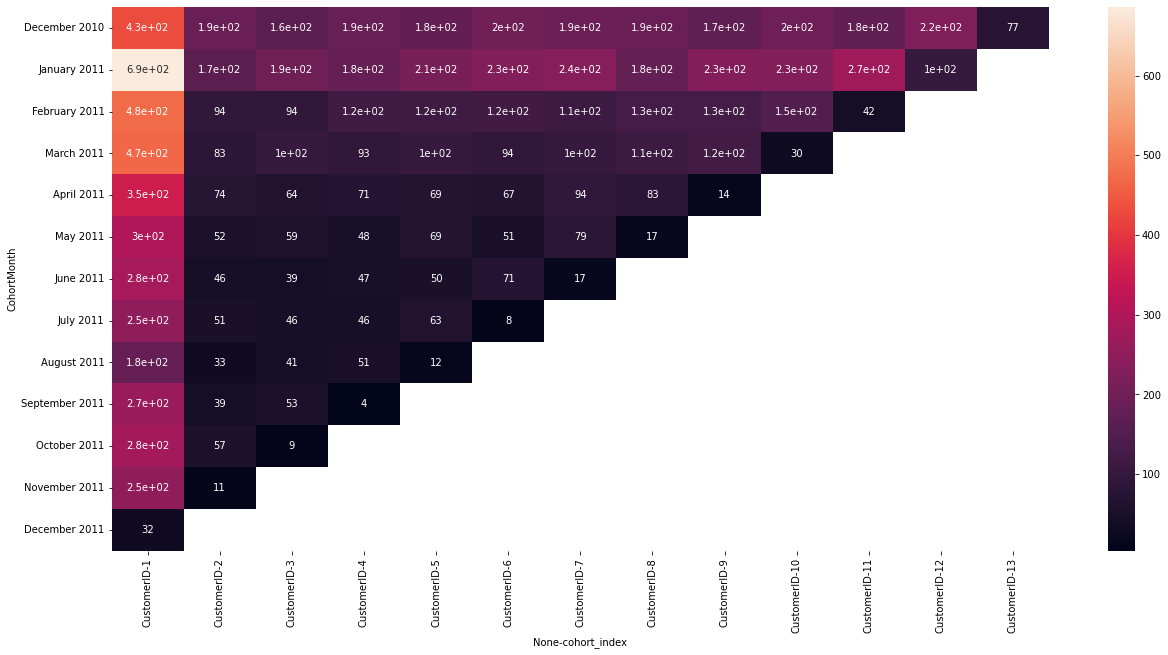

In [50]:
cohort_table.index = pd.to_datetime(cohort_table.index)
#change index
cohort_table.index = cohort_table.index.strftime('%B %Y')

#Visualize result in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True)


In [51]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

<AxesSubplot:xlabel='None-cohort_index', ylabel='CohortMonth'>

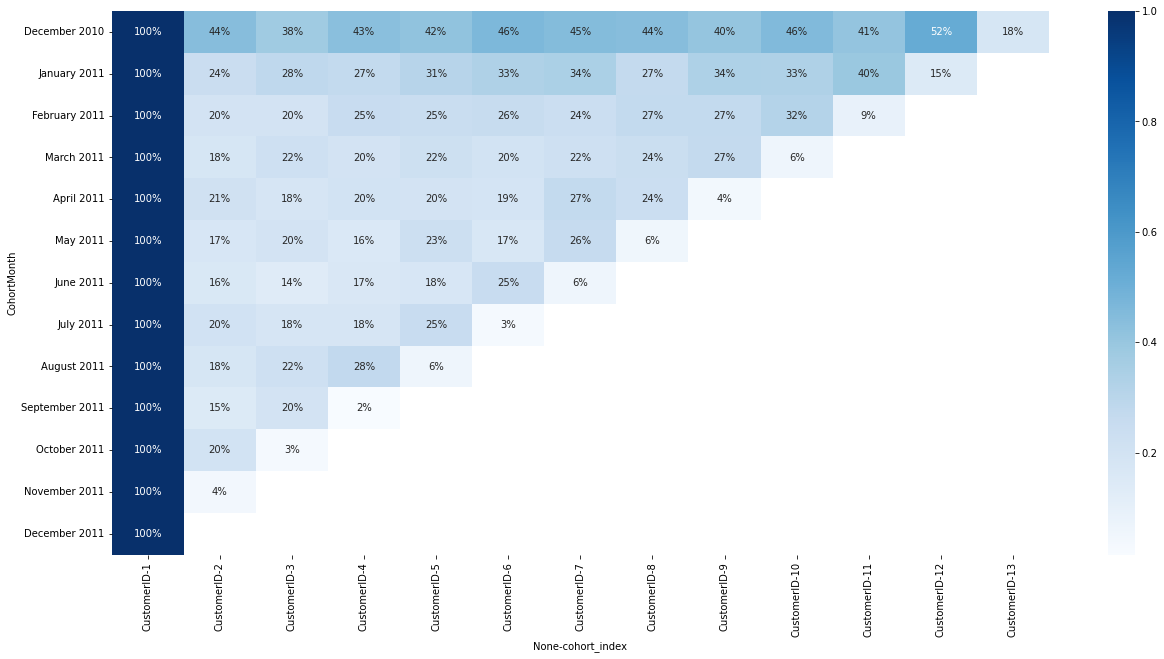

In [52]:
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%',cmap='Blues')

In [53]:
df2

InvoiceNo StockCode                      Description  Quantity  \
15543     538365     22469            HEART OF WICKER SMALL         8   
15544     538365    84030E    ENGLISH ROSE HOT WATER BOTTLE         1   
15545     538365     22112       CHOCOLATE HOT WATER BOTTLE         3   
15546     538365     22835  HOT WATER BOTTLE I AM SO POORLY         5   
15547     538365    84029E   RED WOOLLY HOTTIE WHITE HEART.         4   
...          ...       ...                              ...       ...   
392727    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
392728    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
392729    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
392730    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
392731    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
15543  2010-12-12 10:11:00       1.65     17243.0  United Kingdom   
15544  2010-12-12 10:11:00       4.25     17243.0  United Kingdom   
15545  2010-12-12 10:11:00       4.95     17243.0  United Kingdom   
15546  2010-12-12 10:11:00       4.65     17243.0  United Kingdom   
15547  2010-12-12 10:11:00       3.75     17243.0  United Kingdom   
...                    ...        ...         ...             ...   
392727 2011-09-12 12:50:00       0.85     12680.0          France   
392728 2011-09-12 12:50:00       2.10     12680.0          France   
392729 2011-09-12 12:50:00       4.15     12680.0          France   
392730 2011-09-12 12:50:00       4.15     12680.0          France   
392731 2011-09-12 12:50:00       4.95     12680.0          France   

       InvoiceMonth CohortMonth  cohort_index  
15543    2010-12-01  2010-12-01             1  
15544    2010-12-01  2010-12-01             1  
15545    2010-12-01  2010-12-01             1  
15546    2010-12-01  2010-12-01             1  
15547    2010-12-01  2010-12-01             1  
...             ...         ...           ...  
392727   2011-09-01  2011-08-01             2  
392728   2011-09-01  2011-08-01             2  
392729   2011-09-01  2011-08-01             2  
392730   2011-09-01  2011-08-01             2  
392731   2011-09-01  2011-08-01             2  

[377189 rows x 11 columns]

In [54]:
df2['Total'] = df2['UnitPrice']*df2['Quantity']

In [55]:
day='2012-01-01'
day=pd.to_datetime(day)

# Recency, Frequency, Monetary

Recency is how recently the customer was active, means the number of days  between today and the customer last  date of purchase

Frequency is the number of transactions done by a particular customer that we get  from grouping the customers data and then count the no. of transactions

Monetary is revenue generated by  one particular customer 




In [56]:
RFM_all= df2.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (day - x.max()).days,
                                             'InvoiceNo': 'count',
                                             'Total': 'sum'}).rename(columns = {'InvoiceDate': 'Recency',
                                                                                   'InvoiceNo': 'Frequency',
                                                                                   'Total': 'Monetary'})


In [57]:
RFM_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4259 entries, 0 to 4258
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4259 non-null   float64
 1   Recency     4259 non-null   int64  
 2   Frequency   4259 non-null   int64  
 3   Monetary    4259 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 133.2 KB


In [58]:
RFM=RFM_all[RFM_all['Monetary'] <= 116886.88]

# Assigning the RFM score

In [59]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(RFM['Recency'], 4, labels = r_labels)
RFM = RFM.assign(R = r_quartiles.values)

f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(RFM['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(RFM['Monetary'], 4, labels = m_labels)
RFM = RFM.assign(F = f_quartiles.values)
RFM = RFM.assign(M = m_quartiles.values)
#RFM.head()

In [60]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
RFM['RFM_Segment'] = RFM.apply(join_rfm, axis=1)

RFM['RFM_Score'] = RFM[['R','F','M']].sum(axis=1)
RFM.head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
0     12346.0      347          1  77183.60  1  1  4   1.01.04.0          6
1     12347.0       61        151   3598.21  3  4  4   3.04.04.0         11
2     12348.0       97         31   1797.24  2  2  4   2.02.04.0          8
3     12349.0       40         73   1757.55  4  3  4   4.03.04.0         11
4     12350.0      332         17    334.40  1  1  2   1.01.02.0          4

In [61]:
RFM

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
0        12346.0      347          1  77183.60  1  1  4   1.01.04.0          6
1        12347.0       61        151   3598.21  3  4  4   3.04.04.0         11
2        12348.0       97         31   1797.24  2  2  4   2.02.04.0          8
3        12349.0       40         73   1757.55  4  3  4   4.03.04.0         11
4        12350.0      332         17    334.40  1  1  2   1.01.02.0          4
...          ...      ...        ...       ... .. .. ..         ...        ...
4254     18280.0      181         10    180.60  1  1  1   1.01.01.0          3
4255     18281.0       25          7     80.82  4  1  1   4.01.01.0          6
4256     18282.0      237         12    178.05  1  1  1   1.01.01.0          3
4257     18283.0       31        721   2045.53  4  4  4   4.04.04.0         12
4258     18287.0       21         70   1837.28  4  3  4   4.03.04.0         11

[4252 rows x 9 columns]

In [62]:
segment_data = RFM.copy()

# Segmentation according to the RFM Score

In [63]:
def create_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Middle'
    else:
        return 'Low'
    
RFM['General_Segment'] = RFM.apply(create_segment, axis=1)
RFM.groupby('General_Segment').agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'Monetary': ['mean', 'count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Low               233.8      11.1    191.4   728
Middle            128.8      34.6    706.1  1870
Top                53.8     177.8   3525.1  1654

In [64]:
RFM.groupby('RFM_Score').agg({'Recency': 'mean',
                                   'Frequency': 'mean',
                                   'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           269.0       8.0    152.2   355
4           200.2      14.1    228.6   373
5           177.8      20.8    357.9   515
6           124.4      26.9    627.6   475
7           119.0      39.8    849.3   424
8            87.2      53.2   1047.8   456
9            75.6      76.0   1438.8   408
10           60.7     119.0   1947.3   436
11           46.7     182.3   4171.5   417
12           31.2     344.0   6755.8   393

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

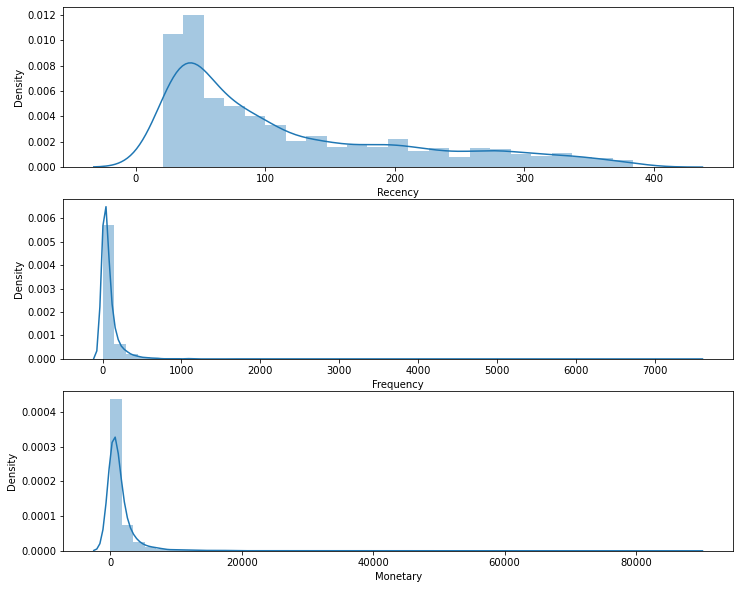

In [65]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'])

As we can see from the above plots, all the variables do not have a symmetrical distribution. All of them are skewed to the right. To remove the skewness ,we can try the following transformations:

1.log transformations

2.Box-Cox transformations

3.Cube root transformations

In [66]:
# Checking for constant mean and variance.
RFM[['Recency','Frequency','Monetary']].describe()

Recency    Frequency      Monetary
count  4252.000000  4252.000000   4252.000000
mean    117.619944    86.263405   1714.547280
std      94.561320   200.310759   4498.260647
min      21.000000     1.000000      0.000000
25%      43.000000    17.000000    302.430000
50%      81.000000    40.000000    659.435000
75%     174.000000    96.000000   1626.507500
max     384.000000  7491.000000  87591.700000

In [67]:
RFM[RFM['Monetary'] == 0]

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
674     13256.0       36          1       0.0  4  1  1   4.01.01.0          6   

    General_Segment  
674          Middle

In [68]:
RFM = RFM[RFM['Monetary'] > 0]
RFM.reset_index(drop=True,inplace=True)

In [69]:
nor_data= RFM[['Recency','Frequency','Monetary']]

In [70]:
nor_data

Recency  Frequency  Monetary
0         347          1  77183.60
1          61        151   3598.21
2          97         31   1797.24
3          40         73   1757.55
4         332         17    334.40
...       ...        ...       ...
4246      181         10    180.60
4247       25          7     80.82
4248      237         12    178.05
4249       31        721   2045.53
4250       21         70   1837.28

[4251 rows x 3 columns]

Let us now apply log transformation to the data and normalize it.

In [71]:
from sklearn.preprocessing import StandardScaler
# Unskew the data
data_log = np.log(nor_data)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(nor_data)

# Scale and center the data
data_normalized = scaler.transform(nor_data)

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_log, index=nor_data.index, columns=nor_data.columns)

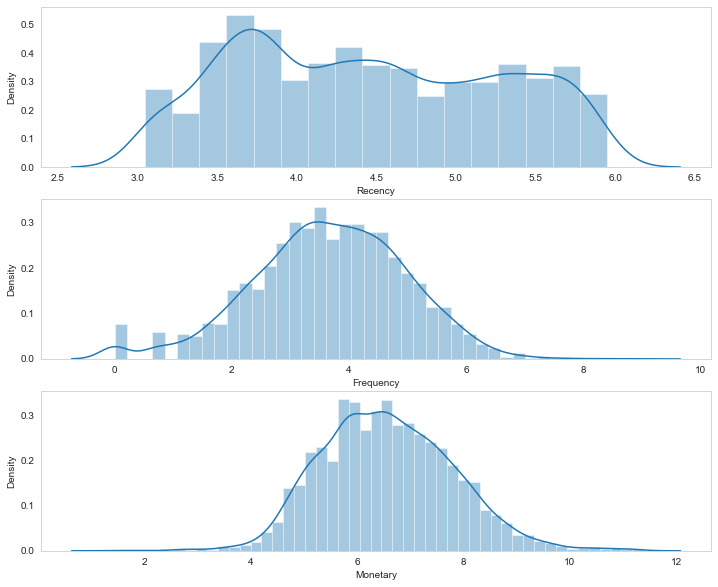

In [126]:
#Checking for skewness in the data now
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['Monetary'])

# Show the plot
plt.show()


# Elbow method

The elbow method is a technique to determine the optimal number of clusters in a dataset. It is called the elbow method because the optimal number of clusters often appears as an "elbow" point in a plot of the within-cluster sum of squares (WCSS) against the number of clusters.


In [73]:
from sklearn.cluster import KMeans

In [74]:
wcss ={}
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1, init = 'k-means++')
    kmeans.fit(data_norm)
    wcss[i] = kmeans.inertia_                                                             

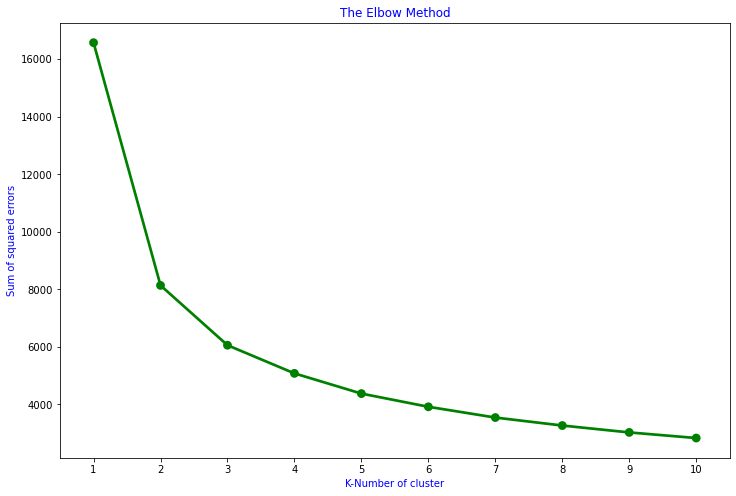

In [75]:

plt.figure(figsize=(12,8))

plt.title('The Elbow Method',color='Blue')
plt.xlabel('K-Number of cluster',color='Blue'); 
plt.ylabel('Sum of squared errors',color='Blue')

sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()),color='Green')
plt.show()

#  KNN

In [76]:
#kmeans=KMeans(n_clusters=3)
#kmeans.fit(data_norm)
#RFM["Cluster"]=(kmeans.labels_+1)

kmeans = KMeans(n_clusters=4, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(data_norm)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

In [77]:
# Create a cluster label column in the original DataFrame
data_norm_k3 = data_norm.assign(Cluster = cluster_labels)
data_k3 = nor_data.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
summary_k3 = data_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)


In [78]:
summary_k3

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          74.0      78.0   1404.0  1383
1         179.0       7.0    213.0   732
2         163.0      29.0    457.0  1418
3          50.0     297.0   6329.0   718

In [79]:
df2.to_csv('clean.csv', index=False)

In [80]:
RFM.to_csv('RFM.csv', index=False)

In [81]:

data_k3.index = RFM['CustomerID'].astype(int)

In [82]:
data_k3

Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346           347          1  77183.60        0
12347            61        151   3598.21        3
12348            97         31   1797.24        0
12349            40         73   1757.55        0
12350           332         17    334.40        2
...             ...        ...       ...      ...
18280           181         10    180.60        1
18281            25          7     80.82        1
18282           237         12    178.05        1
18283            31        721   2045.53        3
18287            21         70   1837.28        0

[4251 rows x 4 columns]

In [83]:
data_k3.to_csv('data_k3.csv', index=False)

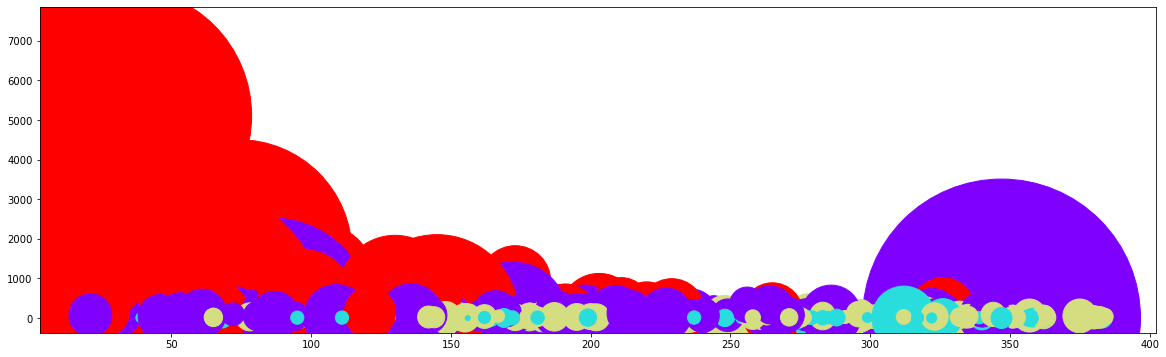

In [84]:
data_with_clusters = data_k3.copy()
data_with_clusters['Cluster'] = cluster_labels 
plt.scatter(data_with_clusters['Recency'],data_with_clusters['Frequency'],data_with_clusters['Monetary'],c=data_with_clusters['Cluster'],cmap='rainbow')

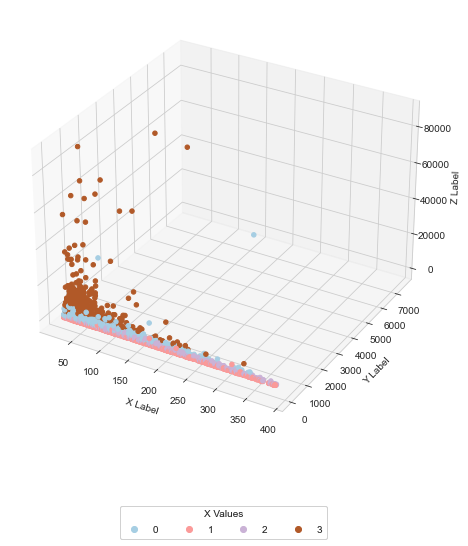

In [85]:
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

g = ax.scatter(data_with_clusters['Recency'],data_with_clusters['Frequency'],data_with_clusters['Monetary'], c=data_with_clusters['Cluster'], marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="X Values", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()


In [86]:
segment_data.to_csv('segment_data.csv', index=False)


# ALL DATASET 

In [87]:
#first creating the column indicating revenue contributed per customer
df['revenue'] = df['Quantity']*df['UnitPrice']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84406B  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84406B       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  revenue  
0 2010-01-12 08:26:00       2.55     17850.0  United Kingdom    15.30  
1 2010-01-12 08:26:00       3.39     17850.0  United Kingdom    20.34  
2 2010-01-12 08:26:00       2.75     17850.0  United Kingdom    22.00  
3 2010-01-12 08:26:00       3.39     17850.0  United Kingdom    20.34  
4 2010-01-12 08:26:00       3.39     17850.0  United Kingdom    20.34

In [88]:
revenue_contributed = df.groupby('CustomerID')['revenue'].sum()
revenue_contributed = revenue_contributed.reset_index()
revenue_contributed.head()

CustomerID   revenue
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

In [89]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.head()

CustomerID  InvoiceNo
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [90]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['duration'] = df['InvoiceDate'].max() - df['InvoiceDate']
df['duration']

0        697 days 08:53:00
1        697 days 08:53:00
2        697 days 08:53:00
3        697 days 08:53:00
4        697 days 08:53:00
                ...       
392727    89 days 04:29:00
392728    89 days 04:29:00
392729    89 days 04:29:00
392730    89 days 04:29:00
392731    89 days 04:29:00
Name: duration, Length: 392732, dtype: timedelta64[ns]

In [91]:
recency = df.groupby('CustomerID')['duration'].min()
recency = recency.reset_index()
recency.head()

CustomerID          duration
0     12346.0 326 days 07:18:00
1     12347.0  40 days 04:54:00
2     12348.0  76 days 04:06:00
3     12349.0  19 days 07:28:00
4     12350.0 311 days 01:18:00

In [92]:
#merging data
rf = pd.merge(revenue_contributed, frequency, on='CustomerID', how='inner')
rfm = pd.merge(rf, recency, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'revenue', 'frequency', 'recency']
rfm['recency'] = rfm['recency'].dt.days
rfm.head()

CustomerID   revenue  frequency  recency
0     12346.0  77183.60          1      326
1     12347.0   4310.00        182       40
2     12348.0   1797.24         31       76
3     12349.0   1757.55         73       19
4     12350.0    334.40         17      311

# Outlier treatment

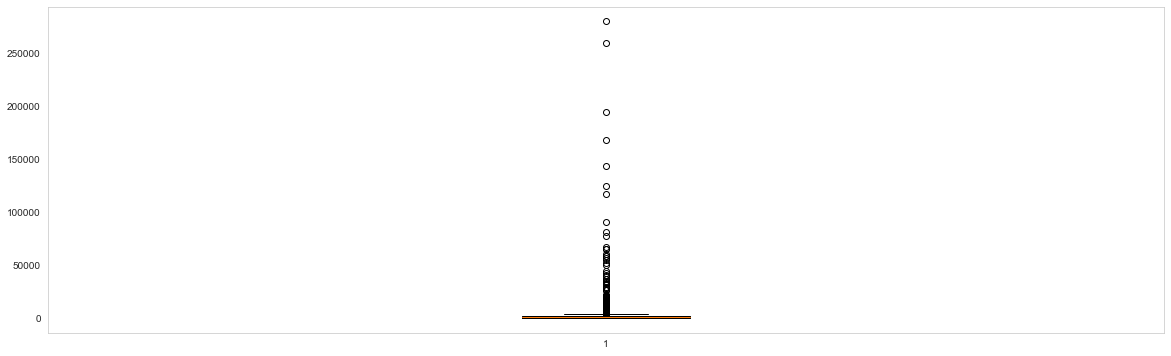

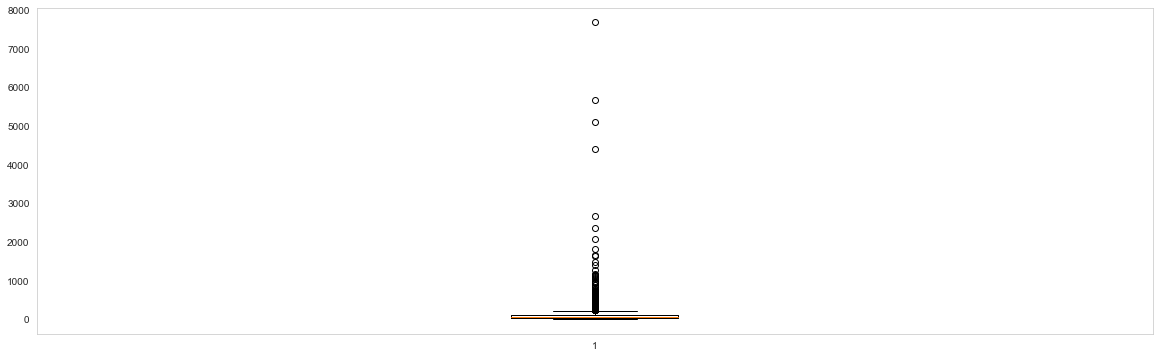

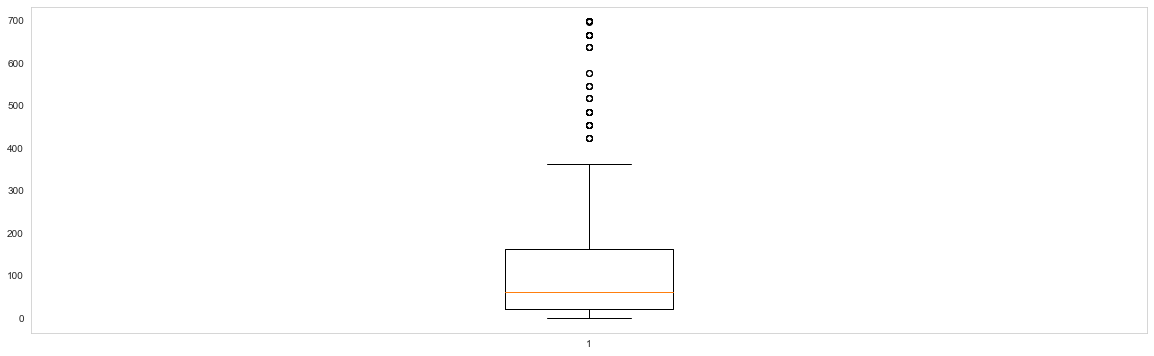

In [93]:
plt.boxplot(rfm['revenue'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['recency'])
plt.show()

# IQR (interquartile range)

IQR stands for Interquartile Range, which is a measure of variability in statistics. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) in a dataset.

In [94]:
q1_rev = rfm['revenue'].quantile(0.05)
q3_rev= rfm['revenue'].quantile(0.95)
IQR = q3_rev - q1_rev
rfm = rfm[(rfm['revenue'] >= q1_rev - 1.5*IQR) & (rfm['revenue'] <= q3_rev + 1.5*IQR)]



In [96]:
q1_freq = rfm['frequency'].quantile(0.05)
q3_freq = rfm['frequency'].quantile(0.95)
IQR = q3_freq - q1_freq
rfm = rfm[(rfm['frequency'] >= q1_freq - 1.5*IQR) & (rfm['frequency'] <= q3_freq + 1.5*IQR)]



In [98]:
q1_rec = rfm['recency'].quantile(0.05)
q3_rec = rfm['recency'].quantile(0.95)
IQR = q3_rec - q1_rec
rfm = rfm[(rfm['recency'] >= q1_rec - 1.5*IQR) & (rfm['recency'] <= q3_rec + 1.5*IQR)]

In [ ]:
rfm

In [100]:
import datetime as dt

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [101]:
#Scaling the features
scale = StandardScaler()
cols = ['revenue', 'frequency', 'recency']
rfm_scaler = scale.fit_transform(rfm[cols])

In [102]:
rfm_scaled = pd.DataFrame(rfm_scaler)
rfm_scaled.columns = ['revenue', 'frequency', 'recency']
rfm_scaled.head()

revenue  frequency   recency
0  1.660541   1.082775 -0.580282
1  0.267485  -0.456323 -0.268439
2  0.245481  -0.028230 -0.762191
3 -0.543503  -0.599021  1.767208
4  0.660439   0.094083 -0.294426

# Hopkins Statistic

The Hopkins statistic is a way of measuring the cluster tendency of a data set.

Hopkins statastics value should be near to 1 or 0 and not close to 0.5

In [103]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [104]:
hopkins(rfm_scaled)


0.9658919805651479

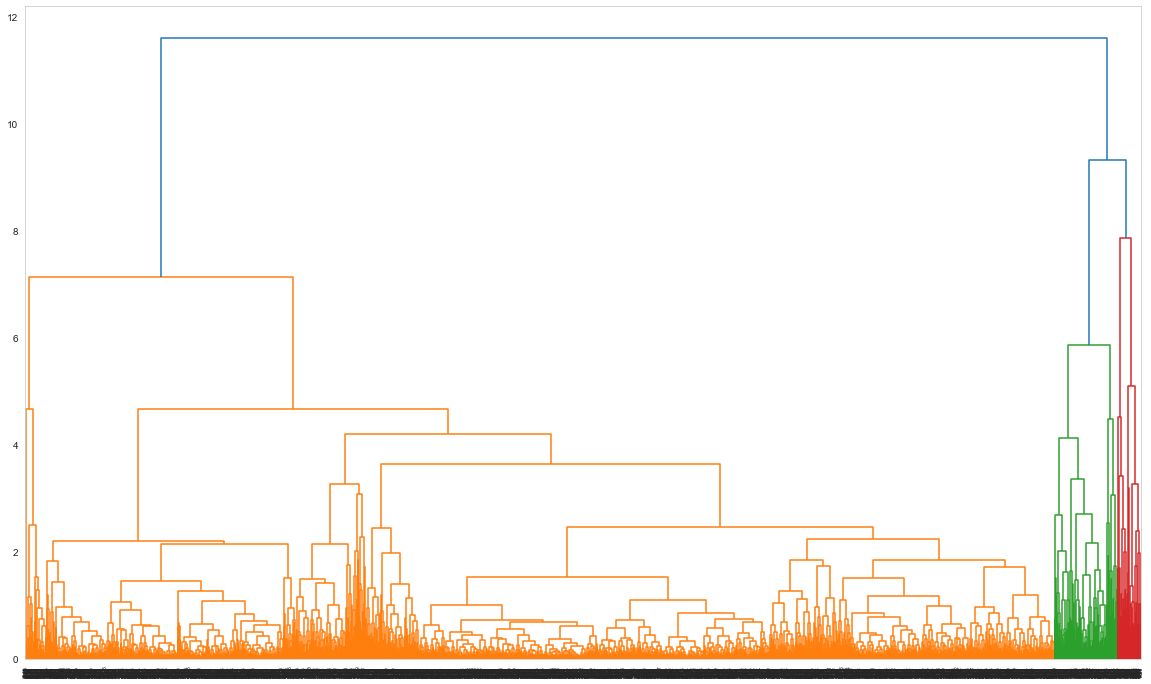

In [105]:
# complete linkage
plt.figure(figsize=(20,12))

mergings = linkage(rfm_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [106]:
# clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 1, 0])

In [107]:
# assign cluster labels
pd.set_option('display.max_rows', None)
rfm['cluster_labels'] = cluster_labels
rfm.head(90)

CustomerID   revenue  frequency  recency  cluster_labels
1      12347.0   4310.00        182       40               0
2      12348.0   1797.24         31       76               0
3      12349.0   1757.55         73       19               0
4      12350.0    334.40         17      311               0
5      12352.0   2506.04         85       73               0
6      12353.0     89.00          4      204               0
7      12354.0   1079.40         58      233               0
8      12355.0    459.40         13       96               0
9      12356.0   2811.43         59       23               0
10     12357.0   6207.67        131      182               0
11     12358.0   1168.06         19        3               0
12     12359.0   6310.03        245        9               1
13     12360.0   2662.06        129       53               0
14     12361.0    189.90         10      288               0
15     12362.0   5226.23        266       30               1
16     12363.0    552.00         23       36               0
17     12364.0   1313.10         85       41               0
18     12365.0    641.38         22      292               0
19     12367.0    168.90         11      212               0
20     12370.0   3541.94        166       52               0
21     12371.0   1887.96         63       30               0
22     12372.0   1298.04         52       35               0
23     12373.0    364.60         14      342               0
24     12374.0    742.93         33       26               0
25     12375.0    457.50         17       11               0
26     12377.0   1628.12         77      316               0
27     12378.0   4008.62        219      305               0
28     12379.0    852.24         40       82               0
29     12380.0   2724.81        104       22               0
30     12381.0   1845.31         87        0               0
31     12383.0   1850.56         99        9               0
32     12384.0    585.27         27       29               0
33     12386.0    401.90         10      192               0
34     12388.0   2780.66        100       16               0
35     12390.0    549.84         32       80               0
36     12391.0    439.66         93       22               0
37     12393.0   1582.60         64       39               0
38     12394.0   1272.48         27      153               0
39     12395.0   3018.63        156        5               0
40     12397.0   2409.90        126      136               0
41     12398.0   1635.66         85       46               0
42     12399.0   1108.65         59        2               0
43     12401.0     84.30          5       99               0
44     12402.0    225.60         11      324               0
45     12403.0    427.70          5       50               0
46     12405.0   1710.39         54      149               0
47     12406.0   3415.30        105       22               0
48     12407.0   1708.12         77       50               0
49     12408.0   2888.55        105      152               0
50     12409.0  11072.67        109       65               2
51     12410.0    693.33         26      252               0
52     12412.0   1226.88         61       75               0
53     12413.0    758.10         38      192               0
54     12414.0    562.41         18      188               0
56     12417.0   3649.10        192       40               0
57     12418.0    668.58         34      113               0
58     12420.0    600.39         29      153               0
59     12421.0    807.04         45       16               0
60     12422.0    803.56         39      169               0
61     12423.0   1859.31        125       89               0
62     12424.0   1760.96         30      163               0
63     12425.0    777.20         36       78               0
64     12426.0    582.73         30      195               0
65     12427.0    825.80         31       22               0
66     12428.0   7956.46        294    

In [108]:
mean_values = rfm.groupby(['cluster_labels']).agg({'recency': 'mean',
                                                    'frequency': 'mean',
                                                    'revenue': ['mean', 'count'],}).round(0)


In [109]:
mean_values

recency frequency  revenue      
                  mean      mean     mean count
cluster_labels                                 
0                114.0      55.0    932.0  3927
1                 26.0     352.0   4433.0   240
2                 29.0     116.0   8956.0    55
3                 21.0     434.0  10585.0    36

In [110]:
summary_k3

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          74.0      78.0   1404.0  1383
1         179.0       7.0    213.0   732
2         163.0      29.0    457.0  1418
3          50.0     297.0   6329.0   718

In [111]:
rfm['cluster_labels'].value_counts()

0    3927
1     240
2      55
3      36
Name: cluster_labels, dtype: int64

<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

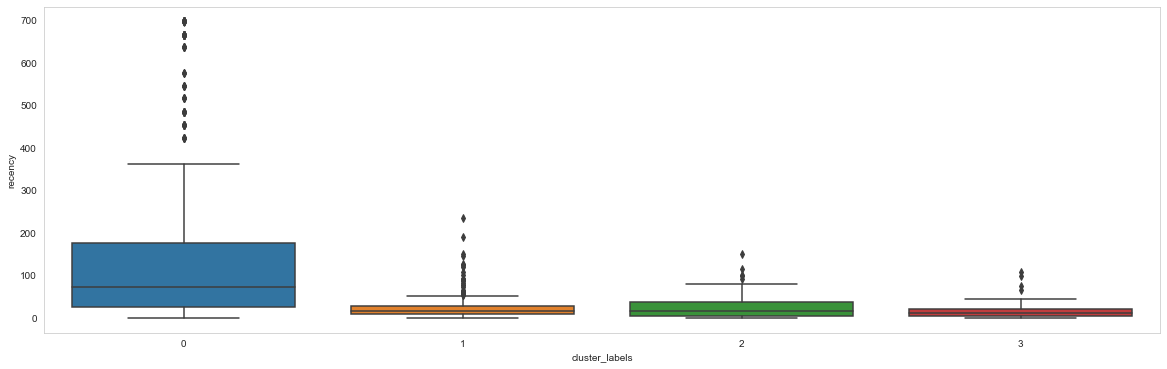

In [112]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=rfm)

<AxesSubplot:xlabel='cluster_labels', ylabel='frequency'>

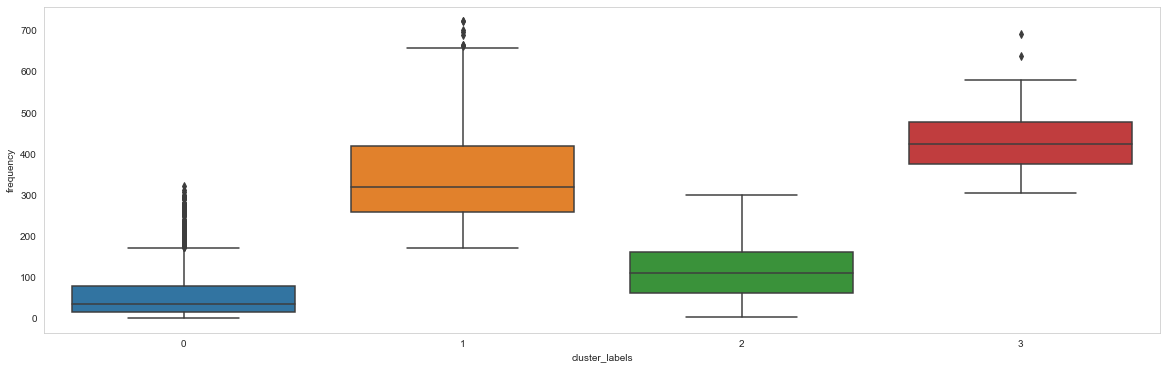

In [113]:
# plots
sns.boxplot(x='cluster_labels', y='frequency', data=rfm)


<AxesSubplot:xlabel='cluster_labels', ylabel='revenue'>

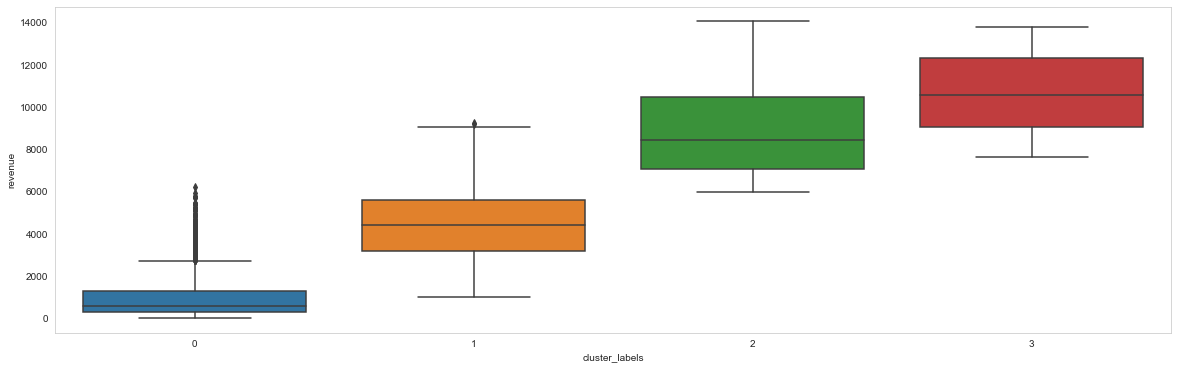

In [114]:
# plots
sns.boxplot(x='cluster_labels', y='revenue', data=rfm)

In [115]:
rfm

CustomerID    revenue  frequency  recency  cluster_labels
1        12347.0   4310.000        182       40               0
2        12348.0   1797.240         31       76               0
3        12349.0   1757.550         73       19               0
4        12350.0    334.400         17      311               0
5        12352.0   2506.040         85       73               0
6        12353.0     89.000          4      204               0
7        12354.0   1079.400         58      233               0
8        12355.0    459.400         13       96               0
9        12356.0   2811.430         59       23               0
10       12357.0   6207.670        131      182               0
11       12358.0   1168.060         19        3               0
12       12359.0   6310.030        245        9               1
13       12360.0   2662.060        129       53               0
14       12361.0    189.900         10      288               0
15       12362.0   5226.230        266       30               1
16       12363.0    552.000         23       36               0
17       12364.0   1313.100         85       41               0
18       12365.0    641.380         22      292               0
19       12367.0    168.900         11      212               0
20       12370.0   3541.940        166       52               0
21       12371.0   1887.960         63       30               0
22       12372.0   1298.040         52       35               0
23       12373.0    364.600         14      342               0
24       12374.0    742.930         33       26               0
25       12375.0    457.500         17       11               0
26       12377.0   1628.120         77      316               0
27       12378.0   4008.620        219      305               0
28       12379.0    852.240         40       82               0
29       12380.0   2724.810        104       22               0
30       12381.0   1845.310         87        0               0
31       12383.0   1850.560         99        9               0
32       12384.0    585.270         27       29               0
33       12386.0    401.900         10      192               0
34       12388.0   2780.660        100       16               0
35       12390.0    549.840         32       80               0
36       12391.0    439.660         93       22               0
37       12393.0   1582.600         64       39               0
38       12394.0   1272.480         27      153               0
39       12395.0   3018.630        156        5               0
40       12397.0   2409.900        126      136               0
41       12398.0   1635.660         85       46               0
42       12399.0   1108.650         59        2               0
43       12401.0     84.300          5       99               0
44       12402.0    225.600         11      324               0
45       12403.0    427.700          5       50               0
46       12405.0   1710.390         54      149               0
47       12406.0   3415.300        105       22               0
48       12407.0   1708.120         77       50               0
49       12408.0   2888.550        105      152               0
50       12409.0  11072.670        109       65               2
51       12410.0    693.330         26      252               0
52       12412.0   1226.880         61       75               0
53       12413.0    758.100         38      192               0
54       12414.0    562.410         18      188               0
56       12417.0   3649.100        192       40               0
57       12418.0    668.580         34      113               0
58       12420.0    600.390         29      153               0
59       12421.0    807.040         45       16               0
60       12422.0    803.560         39      169               0
61       12423.0   1859.310        125       89               0
62       12424.0   1760.960         30      163               0
63       12425.0    777.200         36

In [116]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(rfm['recency'], 4, labels = r_labels)
rfm = rfm.assign(R = r_quartiles.values)

f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(rfm['frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(rfm['revenue'], 4, labels = m_labels)
rfm = rfm.assign(F = f_quartiles.values)
rfm = rfm.assign(M = m_quartiles.values)
#RFM.head()

In [117]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['rfm_Segment'] = rfm.apply(join_rfm, axis=1)

#rfm['rfm_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm.head()

CustomerID  revenue  frequency  recency  cluster_labels  R  F  M  \
1     12347.0  4310.00        182       40               0  3  4  4   
2     12348.0  1797.24         31       76               0  2  2  4   
3     12349.0  1757.55         73       19               0  4  3  4   
4     12350.0   334.40         17      311               0  1  1  2   
5     12352.0  2506.04         85       73               0  2  3  4   

  rfm_Segment  
1   3.04.04.0  
2   2.02.04.0  
3   4.03.04.0  
4   1.01.02.0  
5   2.03.04.0

In [118]:
rfm['rfm_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm.head()

CustomerID  revenue  frequency  recency  cluster_labels  R  F  M  \
1     12347.0  4310.00        182       40               0  3  4  4   
2     12348.0  1797.24         31       76               0  2  2  4   
3     12349.0  1757.55         73       19               0  4  3  4   
4     12350.0   334.40         17      311               0  1  1  2   
5     12352.0  2506.04         85       73               0  2  3  4   

  rfm_Segment  rfm_Score  
1   3.04.04.0         11  
2   2.02.04.0          8  
3   4.03.04.0         11  
4   1.01.02.0          4  
5   2.03.04.0          9

In [119]:
rfm.to_csv('rfm_final.csv', index=False)

In [120]:
def create_segment(df):
    if df['rfm_Score'] >= 9:
        return 'Top'
    elif (df['rfm_Score'] >= 5) and (df['rfm_Score'] < 9):
        return 'Middle'
    else:
        return 'Low'
    
rfm['General_Segment'] = rfm.apply(create_segment, axis=1)
rfm.groupby('General_Segment').agg({'revenue': 'mean',
                                         'frequency': 'mean',
                                         'recency': ['mean', 'count']}).round(1)

revenue frequency recency      
                   mean      mean    mean count
General_Segment                                
Low               191.7      10.9   243.8   727
Middle            613.1      34.3   117.0  1881
Top              2609.4     151.6    35.3  1650

In [121]:
rfm

CustomerID    revenue  frequency  recency  cluster_labels  R  F  M  \
1        12347.0   4310.000        182       40               0  3  4  4   
2        12348.0   1797.240         31       76               0  2  2  4   
3        12349.0   1757.550         73       19               0  4  3  4   
4        12350.0    334.400         17      311               0  1  1  2   
5        12352.0   2506.040         85       73               0  2  3  4   
6        12353.0     89.000          4      204               0  1  1  1   
7        12354.0   1079.400         58      233               0  1  3  3   
8        12355.0    459.400         13       96               0  2  1  2   
9        12356.0   2811.430         59       23               0  4  3  4   
10       12357.0   6207.670        131      182               0  1  4  4   
11       12358.0   1168.060         19        3               0  4  2  3   
12       12359.0   6310.030        245        9               1  4  4  4   
13       12360.0   2662.060        129       53               0  3  4  4   
14       12361.0    189.900         10      288               0  1  1  1   
15       12362.0   5226.230        266       30               1  3  4  4   
16       12363.0    552.000         23       36               0  3  2  2   
17       12364.0   1313.100         85       41               0  3  3  3   
18       12365.0    641.380         22      292               0  1  2  2   
19       12367.0    168.900         11      212               0  1  1  1   
20       12370.0   3541.940        166       52               0  3  4  4   
21       12371.0   1887.960         63       30               0  3  3  4   
22       12372.0   1298.040         52       35               0  3  3  3   
23       12373.0    364.600         14      342               0  1  1  2   
24       12374.0    742.930         33       26               0  3  2  3   
25       12375.0    457.500         17       11               0  4  1  2   
26       12377.0   1628.120         77      316               0  1  3  4   
27       12378.0   4008.620        219      305               0  1  4  4   
28       12379.0    852.240         40       82               0  2  3  3   
29       12380.0   2724.810        104       22               0  4  4  4   
30       12381.0   1845.310         87        0               0  4  3  4   
31       12383.0   1850.560         99        9               0  4  4  4   
32       12384.0    585.270         27       29               0  3  2  2   
33       12386.0    401.900         10      192               0  1  1  2   
34       12388.0   2780.660        100       16               0  4  4  4   
35       12390.0    549.840         32       80               0  2  2  2   
36       12391.0    439.660         93       22               0  4  3  2   
37       12393.0   1582.600         64       39               0  3  3  4   
38       12394.0   1272.480         27      153               0  2  2  3   
39       12395.0   3018.630        156        5               0  4  4  4   
40       12397.0   2409.900        126      136               0  2  4  4   
41       12398.0   1635.660         85       46               0  3  3  4   
42       12399.0   1108.650         59        2               0  4  3  3   
43       12401.0     84.300          5       99               0  2  1  1   
44       12402.0    225.600         11      324               0  1  1  1   
45       12403.0    427.700          5       50               0  3  1  2   
46       12405.0   1710.390         54      149               0  2  3  4   
47       12406.0   3415.300        105       22               0  4  4  4   
48       12407.0   1708.120         77       50               0  3  3  4   
49       12408.0   2888.550        105      152               0  2  4  4   
50       12409.0  11072.670        109       65               2  2  4  4   
51       12410.0    693.330         26      252               0  1  2  3   
52       12412.0   1226.880         61       75       

In [122]:
rfm.to_csv('segmentation.csv', index=False)

In [123]:
rfm['CustomerID'].count()

4258

In [124]:
df2['CustomerID'].nunique()

4259